In [8]:
# --- BLOQUE 1: IMPORTS + CARGA CSV MULTIANUAL + VISTA INICIAL ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Opciones de visualización
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Rutas de los CSV por año
RUTAS_CSV = {
    2021: "rendimiento-2021.csv",
    2022: "rendimiento-2022.csv",
    2023: "rendimiento-2023.csv",
    2024: "rendimiento-2024.csv",
}

def cargar_csv(ruta):
    """
    Intenta leer el CSV probando separador y codificación más comunes.
    """
    intentos = [
        {"sep": ";", "encoding": "utf-8"},
        {"sep": ";", "encoding": "latin1"},
        {"sep": ",", "encoding": "utf-8"},
    ]
    ultimo_error = None
    for cfg in intentos:
        try:
            df = pd.read_csv(ruta, low_memory=False, **cfg)
            print(f"✅ Cargado {ruta} con sep='{cfg['sep']}', encoding='{cfg['encoding']}'")
            return df
        except Exception as e:
            ultimo_error = e
    raise RuntimeError(f"No se pudo leer el CSV {ruta}. Último error:\n{ultimo_error}")

# Cargar y unificar todos los años
dfs = []
for agno, ruta in RUTAS_CSV.items():
    df_year = cargar_csv(ruta)

    # Normalizamos nombres de columnas a MAYÚSCULAS
    df_year.columns = [c.upper() for c in df_year.columns]

    # Si el dataset no trae columna de año, se la agregamos
    if "AGNO" not in df_year.columns:
        df_year["AGNO"] = agno

    dfs.append(df_year)

# Un solo dataframe con 2021–2024
df = pd.concat(dfs, ignore_index=True)

print("Forma del dataset unificado (2021–2024):", df.shape)
print("\nPrimeras columnas:", list(df.columns[:20]))

# Muestra 5 filas aleatorias
df.sample(5, random_state=42)


✅ Cargado rendimiento-2021.csv con sep=';', encoding='utf-8'
✅ Cargado rendimiento-2022.csv con sep=';', encoding='utf-8'
✅ Cargado rendimiento-2023.csv con sep=';', encoding='utf-8'
✅ Cargado rendimiento-2024.csv con sep=';', encoding='utf-8'
Forma del dataset unificado (2021–2024): (13795433, 38)

Primeras columnas: ['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR', 'COD_JOR']


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN,NOMBRE_SLEP
4585836,2022,8561,8,ESCUELA REPUBLICA DE ALEMANIA,13,RM,131,13101,SANTIAGO,131,SANTIAGO CENTRO,2,1,0,1,110,2,2,A,3,0,0,26617086,2,201409,7,13,13126,QUINTA NORMAL,0,0,0,"6,6",90,P,P,0,NaN
1371443,2021,8903,6,COLEGIO LINCOLN INTERNATIONAL ACADEMY,13,RM,131,13115,LO BARNECHEA,133,SANTIAGO ORIENTE,4,3,0,1,310,5,1,B,3,0,0,20125296,1,200605,15,13,13115,LO BARNECHEA,0,0,0,"6,6",100,P,P,0,NaN
11274370,2024,5725,8,ESCUELA PARTICULAR SAN BERNARDO,9,ARAUC,91,9112,PADRE LAS CASAS,93,CAUTÍN SUR,3,2,0,1,110,2,8,A,3,0,0,6212779,1,201104,13,9,9101,TEMUCO,0,0,0,"6,7",100,P,P,0,
2976312,2021,25695,1,COLEGIO DE LA INMACULADA CONCEPCIÓN,13,RM,134,13401,SAN BERNARDO,132,SANTIAGO SUR,3,2,0,1,110,2,7,A,1,0,0,5093656,2,200901,12,13,13112,LA PINTANA,0,0,0,"6,5",100,P,P,0,NaN
9275836,2023,17635,4,COL. TECNICO PROFESIONAL LOS ACACIOS,8,BBIO,81,8101,CONCEPCIÓN,83,CONCEPCIÓN,3,2,0,1,110,2,1,A,1,0,0,25652330,1,201606,7,8,8101,CONCEPCIÓN,0,0,0,"6,6",94,P,P,0,NaN


In [12]:
# Conversión a numérico

# PROM_GRAL viene con coma decimal -> la cambiamos a punto y convertimos a float
df["PROM_GRAL"] = pd.to_numeric(
    df["PROM_GRAL"].astype(str).str.replace(",", "."),
    errors="coerce"
)

# ASISTENCIA la forzamos a numérico
df["ASISTENCIA"] = pd.to_numeric(df["ASISTENCIA"], errors="coerce")

# EDAD_ALU también a numérico por si viene rara
df["EDAD_ALU"] = pd.to_numeric(df["EDAD_ALU"], errors="coerce")

print(df[["PROM_GRAL", "ASISTENCIA", "EDAD_ALU"]].dtypes)


PROM_GRAL     float64
ASISTENCIA      int64
EDAD_ALU      float64
dtype: object


In [13]:
# --- BLOQUE 2: Exploración y patrones desertores vs reprobados ---

# 1) Exploración básica de columnas
print("📋 Columnas disponibles:\n")
print(list(df.columns))

# Revisión de columnas críticas para el modelo
claves = ["SIT_FIN", "PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]
print("\n🔍 Presencia de columnas clave:")
for c in claves:
    print(f"{c}: {'✅' if c in df.columns else '❌'}")

# Muestra algunas filas con esas columnas (si existen)
columnas_a_ver = [c for c in claves if c in df.columns]
if columnas_a_ver:
    print("\nEjemplo de datos relevantes:")
    display(df[columnas_a_ver].sample(10, random_state=1))
else:
    print("⚠️ Ninguna de las columnas críticas fue encontrada.")

# 2) Distribución de SIT_FIN (para ver códigos reales)
if "SIT_FIN" in df.columns:
    print("\n📊 Distribución de SIT_FIN:")
    print(df["SIT_FIN"].value_counts(dropna=False))
else:
    raise RuntimeError("No existe la columna SIT_FIN en el dataframe.")

# 3) CONFIGURACIÓN: códigos para desertores y reprobados
# 👉 AJUSTA ESTO según tus códigos reales:
#   - Por ejemplo: DESERTORES = ["D"] y REPROBADOS = ["R"]
#   - O si usas Y = Desertor, R = Reprobado: DESERTORES = ["Y"], REPROBADOS = ["R"]
DESERTORES = ["Y"]
REPROBADOS = ["R"]

# Validamos qué códigos existen realmente en los datos
sit_unicos = set(df["SIT_FIN"].dropna().unique())
deser_en_df = [c for c in DESERTORES if c in sit_unicos]
reprob_en_df = [c for c in REPROBADOS if c in sit_unicos]

print("\n✅ Códigos encontrados en el dataset:")
print("   Desertores configurados presentes:", deser_en_df)
print("   Reprobados configurados presentes:", reprob_en_df)

if not deser_en_df or not reprob_en_df:
    print("\n⚠️ Ojo: revisa DESERTORES y REPROBADOS, puede que los códigos no coincidan con SIT_FIN.")
else:
    # 4) Subconjunto solo desertores + reprobados
    df_dr = df[df["SIT_FIN"].isin(deser_en_df + reprob_en_df)].copy()
    print(f"\n📦 Tamaño del subconjunto (desertores + reprobados): {df_dr.shape}")

    # Columnas numéricas a analizar (las que existan)
    cols_num = [c for c in ["PROM_GRAL", "ASISTENCIA", "EDAD_ALU"] if c in df_dr.columns]
    if cols_num:
        print("\n📈 Resumen numérico por grupo (desertor vs reprobado):")
        resumen = (
            df_dr
            .groupby("SIT_FIN")[cols_num]
            .agg(["mean", "median", "std", "min", "max", "count"])
            .round(2)
        )
        display(resumen)
    else:
        print("\n⚠️ No se encontraron columnas numéricas esperadas para el análisis (PROM_GRAL, ASISTENCIA, EDAD_ALU).")

    # 5) Patrones de género si existe GEN_ALU
    if "GEN_ALU" in df_dr.columns:
        print("\n👥 Distribución de género por grupo (desertor vs reprobado):")
        tabla_genero = pd.crosstab(df_dr["SIT_FIN"], df_dr["GEN_ALU"], normalize="index") * 100
        display(tabla_genero.round(1))

    # 6) Comparación directa de medias entre desertores y reprobados
    if len(deser_en_df) == 1 and len(reprob_en_df) == 1 and cols_num:
        cod_des = deser_en_df[0]
        cod_rep = reprob_en_df[0]

        medias = df_dr.groupby("SIT_FIN")[cols_num].mean()
        # desertor - reprobado
        dif_medias = (medias.loc[cod_des] - medias.loc[cod_rep]).to_frame("dif_media_desertor_menos_reprobado")

        print("\n🔍 Diferencia de medias (desertores - reprobados):")
        # Valores cercanos a 0 ⇒ patrones muy similares
        display(dif_medias.round(2))

        print(
            "\n💡 Interpretación sugerida:\n"
            "- Si la diferencia de medias en PROM_GRAL y ASISTENCIA es pequeña, significa que desertores y reprobados\n"
            "  comparten patrones muy parecidos (por ejemplo, ambos con promedios bajos y baja asistencia).\n"
            "- Si alguna diferencia es grande, puede indicar un matiz: ej. reprobados con más asistencia pero peor promedio,\n"
            "  o viceversa."
        )


📋 Columnas disponibles:

['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN', 'SIT_FIN_R', 'COD_MEN', 'NOMBRE_SLEP']

🔍 Presencia de columnas clave:
SIT_FIN: ✅
PROM_GRAL: ✅
ASISTENCIA: ✅
GEN_ALU: ✅
EDAD_ALU: ✅

Ejemplo de datos relevantes:


,SIT_FIN,PROM_GRAL,ASISTENCIA,GEN_ALU,EDAD_ALU
3086520,P,5.7,85,2,16.0
1760648,P,6.4,90,2,10.0
5850444,P,6.4,95,1,12.0
12335014,P,5.2,97,1,17.0
11527847,Y,0.0,0,2,15.0
11269746,P,6.6,100,1,13.0
10372952,P,6.4,91,1,10.0
5581950,P,6.4,97,2,13.0
6805624,P,6.7,98,1,10.0
10660664,Y,0.0,0,1,11.0



📊 Distribución de SIT_FIN:
SIT_FIN
P    12362778
Y     1098109
R      328244
         6302
Name: count, dtype: int64

✅ Códigos encontrados en el dataset:
   Desertores configurados presentes: ['Y']
   Reprobados configurados presentes: ['R']

📦 Tamaño del subconjunto (desertores + reprobados): (1426353, 38)

📈 Resumen numérico por grupo (desertor vs reprobado):


PROM_GRAL                                 ASISTENCIA                                 EDAD_ALU                \
             mean median   std  min  max    count       mean median    std min  max    count     mean median    std   
SIT_FIN                                                                                                               
R            3.58    3.8  1.12  0.0  7.0   328244      66.19   75.0  28.00   0  100   328244    17.80   16.0  10.14   
Y            0.00    0.0  0.07  0.0  7.0  1098109       0.01    0.0   1.07   0  100  1098109    14.32   13.0   8.70   

                             
         min   max    count  
SIT_FIN                      
R        0.0  92.0   328107  
Y        0.0  92.0  1097793


👥 Distribución de género por grupo (desertor vs reprobado):


GEN_ALU,0,1,2
SIT_FIN,,,
R,0.0,61.7,38.3
Y,0.0,52.8,47.2



🔍 Diferencia de medias (desertores - reprobados):


,dif_media_desertor_menos_reprobado
PROM_GRAL,-3.57
ASISTENCIA,-66.18
EDAD_ALU,-3.49



💡 Interpretación sugerida:
- Si la diferencia de medias en PROM_GRAL y ASISTENCIA es pequeña, significa que desertores y reprobados
  comparten patrones muy parecidos (por ejemplo, ambos con promedios bajos y baja asistencia).
- Si alguna diferencia es grande, puede indicar un matiz: ej. reprobados con más asistencia pero peor promedio,
  o viceversa.



📈 Reporte de Clasificación:
              precision    recall  f1-score   support

  Sin Riesgo       0.98      0.99      0.99   3090477
      Riesgo       0.93      0.83      0.87    356475

    accuracy                           0.98   3446952
   macro avg       0.95      0.91      0.93   3446952
weighted avg       0.97      0.98      0.97   3446952



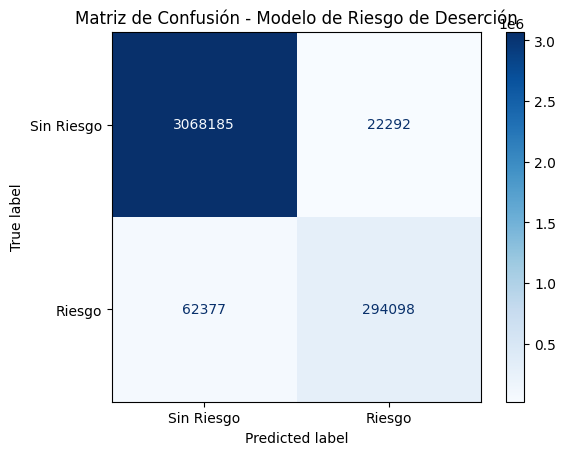

✅ Modelo guardado como modelo_riesgo_desercion.pkl


In [14]:
# --- BLOQUE FINAL: Modelo de riesgo de deserción/reprobación ---

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# 1️⃣ Etiquetado binario
DESERTORES = ["Y"]
REPROBADOS = ["R"]
APROBADOS = ["P"]

df["PROM_GRAL"] = pd.to_numeric(df["PROM_GRAL"].astype(str).str.replace(",", "."), errors="coerce")
df["ASISTENCIA"] = pd.to_numeric(df["ASISTENCIA"], errors="coerce")
df["EDAD_ALU"] = pd.to_numeric(df["EDAD_ALU"], errors="coerce")

df["RIESGO"] = np.where(df["SIT_FIN"].isin(DESERTORES + REPROBADOS), 1,
                        np.where(df["SIT_FIN"].isin(APROBADOS), 0, np.nan))

df = df.dropna(subset=["RIESGO", "PROM_GRAL", "ASISTENCIA", "EDAD_ALU"])
df["RIESGO"] = df["RIESGO"].astype(int)

# 2️⃣ Variables predictoras
X = df[["PROM_GRAL", "ASISTENCIA", "EDAD_ALU"]]
y = df["RIESGO"]

# 3️⃣ División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4️⃣ Modelo + escalado
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 5️⃣ Evaluación
print("\n📈 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["Sin Riesgo", "Riesgo"]))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,
                                      display_labels=["Sin Riesgo", "Riesgo"],
                                      cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Modelo de Riesgo de Deserción")
plt.show()

# 6️⃣ Guardado
joblib.dump(pipeline, "modelo_riesgo_desercion.pkl")
print("✅ Modelo guardado como modelo_riesgo_desercion.pkl")
